<a href="https://colab.research.google.com/github/alicemaldeliduman/alicemaldeliduman/blob/main/IVA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kütüphaneler
import math
import sys
print("User Current Version:-", sys.version)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
import warnings
warnings.filterwarnings("ignore")

User Current Version:- 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [2]:
from google.colab import files
uploaded = files.upload()


Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry.csv


In [3]:
df=pd.read_csv("GlobalLandTemperaturesByCountry.csv",index_col="dt",parse_dates=True)

In [4]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [ ]:
df

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland
...,...,...,...
2013-05-01,19.059,1.022,Zimbabwe
2013-06-01,17.613,0.473,Zimbabwe
2013-07-01,17.000,0.453,Zimbabwe


In [5]:
df=df[df.Country=="Turkey"]
df["time"]=np.arange(len(df.index))
df=df[["AverageTemperature","time"]]
a=df.AverageTemperature.mean()
df["AverageTemperature"].fillna(a,inplace=True)


In [6]:
df


,AverageTemperature,time
dt,,
1777-02-01,3.000000,0
1777-03-01,11.631567,1
1777-04-01,7.678000,2
1777-05-01,15.293000,3
1777-06-01,18.661000,4
...,...,...
2013-05-01,17.522000,2835
2013-06-01,20.862000,2836
2013-07-01,23.335000,2837


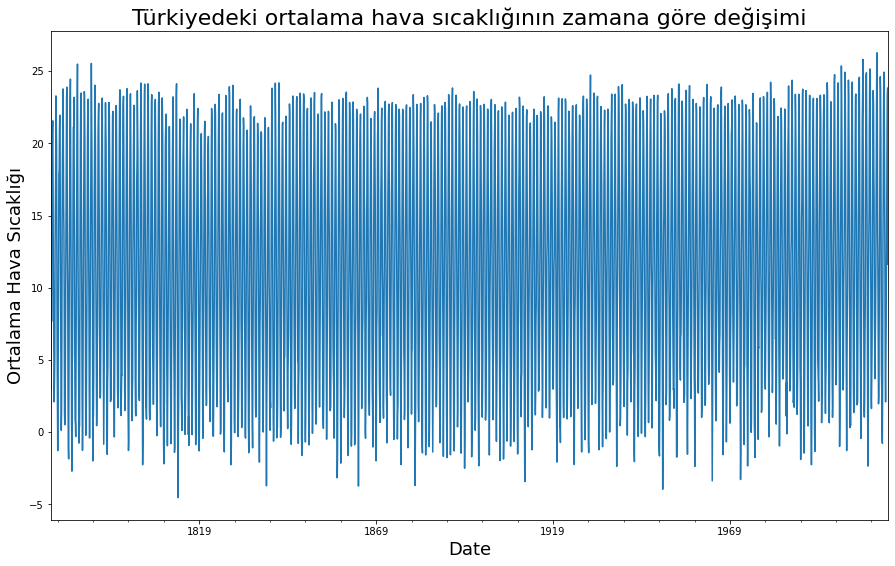

In [7]:
df["AverageTemperature"].plot(figsize=(15,9))
plt.xlabel("Date",fontsize=18);
plt.ylabel("Ortalama Hava Sıcaklığı",fontsize=18);
plt.title("Türkiyedeki ortalama hava sıcaklığının zamana göre değişimi",fontsize=22);


In [9]:
data=df.filter(["AverageTemperature"])
dataset=data.values


In [10]:
#get the number of rows to train the model on
train_data_len=math.ceil(len(dataset)*0.8)

In [11]:
train_x=data.iloc[:2272] #480 dakika ile model eğitilecektir.
test_x=data.iloc[2272:] #10 dakika ile model test edilecektir.

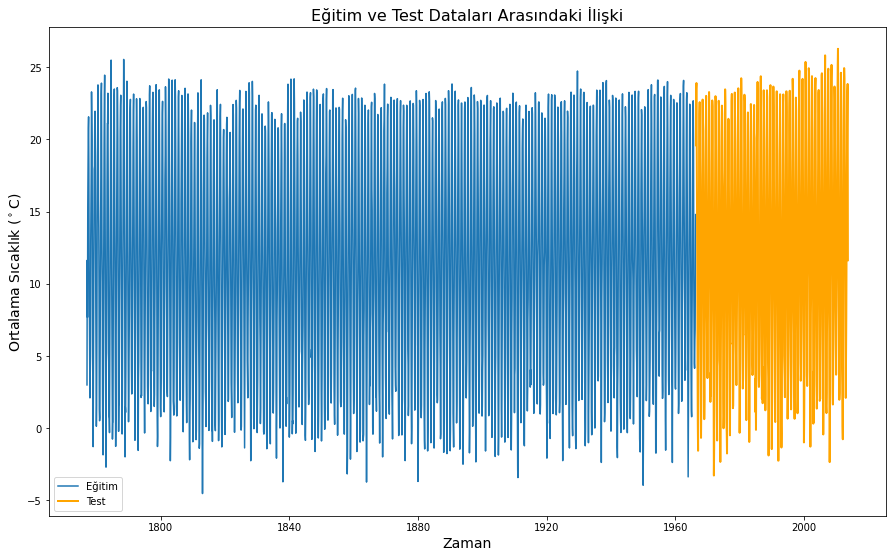

In [13]:
plt.figure(figsize=(15,9))
plt.title("Eğitim ve Test Dataları Arasındaki İlişki",fontsize=16)
plt.xlabel("Zaman",fontsize=14)
plt.ylabel("Ortalama Sıcaklık ($^\circ$C)",fontsize=14)
plt.plot(train_x,label="Eğitim")
plt.plot(test_x,label="Test",color="orange",linewidth=2)
plt.legend(loc="lower left")
plt.show()

In [14]:
train_data_len

2272

In [15]:
#Normalizing data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.24428497],
       [0.52456706],
       [0.39618782],
       ...,
       [0.904598  ],
       [0.92096376],
       [0.52456706]])

In [16]:
#Create the training data set
#Creat the scaled training data set
train_data=scaled_data[:train_data_len,:]
#split the data x_train and y_train dataset
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.24428497, 0.52456706, 0.39618782, 0.64346019, 0.75282504,
       0.82088583, 0.84699312, 0.72938044, 0.50555267, 0.39771399,
       0.25159112, 0.21509287, 0.26646318, 0.30812443, 0.56422912,
       0.64154436, 0.73392648, 0.90307183, 0.8509222 , 0.79357709,
       0.55361086, 0.34452526, 0.23649175, 0.10543577, 0.26675542,
       0.36780751, 0.52844525, 0.72951033, 0.73623198, 0.83257566,
       0.85962463, 0.76714508, 0.57595142, 0.41339784, 0.2676971 ,
       0.1513833 , 0.19778543, 0.35293545, 0.61339135, 0.75844265,
       0.81182621, 0.91878815, 0.83254319, 0.66242369, 0.59754514,
       0.4497662 , 0.18830368, 0.16369009, 0.17145084, 0.31380699,
       0.43924536, 0.64940252, 0.75214314, 0.89800623, 0.92281465,
       0.73834264, 0.5544876 , 0.47632809, 0.22970516, 0.11173529])]
[0.08702428886868425]



In [ ]:
#Convert x_train and y_train to numpy arrays


In [17]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2212, 60, 1)

In [19]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [20]:
#Compile the model
model.compile(optimizer="adam",loss="mse")

In [21]:
#Train the model
model.fit(x_train,y_train,batch_size=20,epochs=30)

Epoch 1/30
111/111 [==============================] - 7s 39ms/step - loss: 0.0810
Epoch 2/30
111/111 [==============================] - 7s 61ms/step - loss: 0.0107
Epoch 3/30
111/111 [==============================] - 4s 37ms/step - loss: 0.0035
Epoch 4/30
111/111 [==============================] - 4s 34ms/step - loss: 0.0030
Epoch 5/30
111/111 [==============================] - 4s 34ms/step - loss: 0.0029
Epoch 6/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0030
Epoch 7/30
111/111 [==============================] - 4s 34ms/step - loss: 0.0028
Epoch 8/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0027
Epoch 9/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0026
Epoch 10/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0025
Epoch 11/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0025
Epoch 12/30
111/111 [==============================] - 4s 33ms/step - loss: 0.0025
Epoch 13/30
1

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Modelin loss değeri ile epochs sayısı arasındaki ilişki')

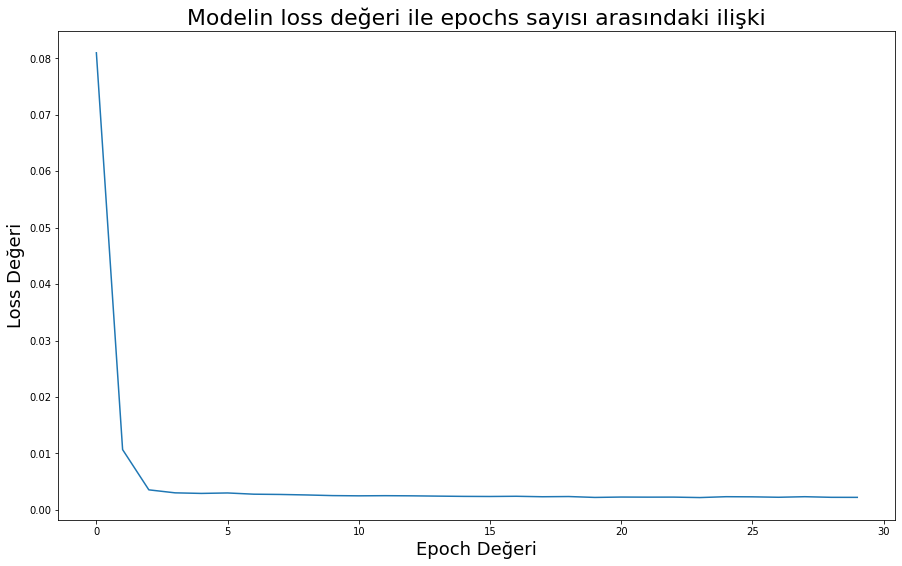

In [24]:
loss_per_epoch=model.history.history["loss"]
plt.figure(figsize=(15,9))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel("Epoch Değeri",fontsize=18)
plt.ylabel("Loss Değeri",fontsize=18)
plt.title("Modelin loss değeri ile epochs sayısı arasındaki ilişki",fontsize=22)


In [25]:
#create test data
#Create new array containing scaled values from index 740 to 1000
test_data=scaled_data[train_data_len-60:,:]
#Create the dataset x_test,y_test
x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [26]:
# Convert the data into numpy array
x_test=np.array(x_test)
x_test.shape

(568, 60)

In [27]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [28]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 11ms/step


In [29]:
#getting the RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.10720284604207829

In [30]:
predictions


array([[ 2.03099785e+01],
       [ 2.30518513e+01],
       [ 2.24504910e+01],
       [ 1.86285973e+01],
       [ 1.31992435e+01],
       [ 7.93831348e+00],
       [ 3.44252491e+00],
       [ 9.74953711e-01],
       [ 2.17753816e+00],
       [ 5.65378809e+00],
       [ 1.02132692e+01],
       [ 1.52347412e+01],
       [ 2.02973766e+01],
       [ 2.37119846e+01],
       [ 2.34718761e+01],
       [ 1.95315228e+01],
       [ 1.38090591e+01],
       [ 8.13272381e+00],
       [ 2.88972259e+00],
       [ 8.32982361e-02],
       [ 1.24939561e+00],
       [ 5.06263161e+00],
       [ 9.82268620e+00],
       [ 1.51392727e+01],
       [ 2.03905773e+01],
       [ 2.36266766e+01],
       [ 2.31271572e+01],
       [ 1.89226074e+01],
       [ 1.32937737e+01],
       [ 7.72201443e+00],
       [ 2.91831732e+00],
       [ 5.81159294e-01],
       [ 2.04526138e+00],
       [ 5.84564781e+00],
       [ 1.05786180e+01],
       [ 1.54208107e+01],
       [ 2.03094063e+01],
       [ 2.35850906e+01],
       [ 2.2

In [31]:
data

,AverageTemperature
dt,
1777-02-01,3.000000
1777-03-01,11.631567
1777-04-01,7.678000
1777-05-01,15.293000
1777-06-01,18.661000
...,...
2013-05-01,17.522000
2013-06-01,20.862000
2013-07-01,23.335000


In [32]:
data.reset_index()

,dt,AverageTemperature
0,1777-02-01,3.000000
1,1777-03-01,11.631567
2,1777-04-01,7.678000
3,1777-05-01,15.293000
4,1777-06-01,18.661000
...,...,...
2835,2013-05-01,17.522000
2836,2013-06-01,20.862000
2837,2013-07-01,23.335000
2838,2013-08-01,23.839000


In [33]:
train=data[:train_data_len]
valid=data[train_data_len:]
valid["Predictions"]=predictions

In [34]:
valid

,AverageTemperature,Predictions
dt,,
1966-06-01,19.593000,20.309978
1966-07-01,23.515000,23.051851
1966-08-01,23.903000,22.450491
1966-09-01,18.564000,18.628597
1966-10-01,15.539000,13.199244
...,...,...
2013-05-01,17.522000,16.315508
2013-06-01,20.862000,21.481894
2013-07-01,23.335000,24.598671


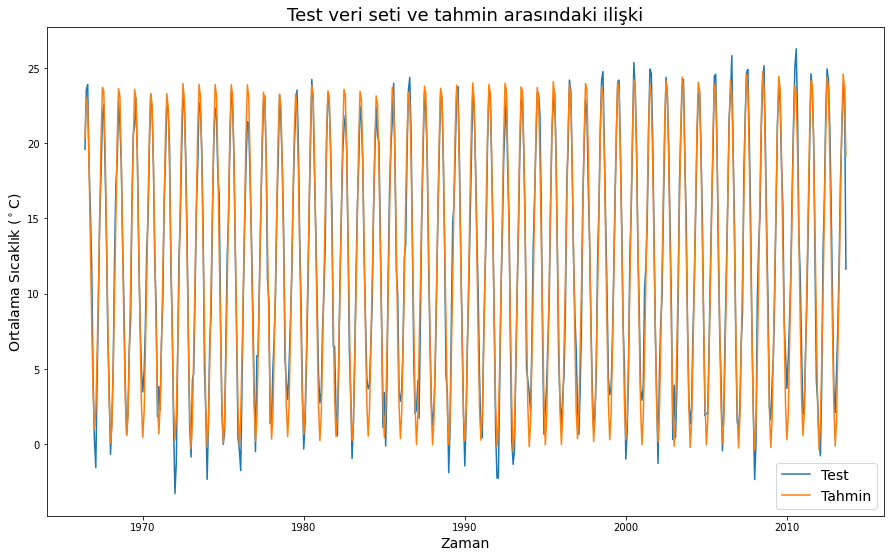

In [36]:
#Visualize the data
plt.figure(figsize=(15,9))
plt.title("Test veri seti ve tahmin arasındaki ilişki",fontsize=18)
plt.xlabel("Zaman",fontsize=14)
plt.ylabel("Ortalama Sıcaklık ($^\circ$C)",fontsize=14)
plt.plot(valid[["AverageTemperature","Predictions"]])
plt.legend(["Test","Tahmin"],loc="lower right",fontsize=14)

plt.show()


In [37]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE=sqrt(mean_squared_error(valid["Predictions"],valid["AverageTemperature"]))
RMSE

1.54441339805006

In [38]:
# Calculate error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from math import sqrt
def give_error(df):
    RMSE=sqrt(mean_squared_error(df["Predictions"],df["AverageTemperature"]))
    MSE=mean_squared_error(df["Predictions"],df["AverageTemperature"])
    MAE=mean_absolute_error(df["Predictions"],df["AverageTemperature"])
    MAPE=mean_absolute_percentage_error(df["Predictions"],df["AverageTemperature"])
    r2_scored=r2_score(df["Predictions"],df["AverageTemperature"])
    print("R_2 DEĞERİ:",r2_scored)
    print("RMSE(Ortalama Karekök Hata): ",RMSE)
    print("MSE(Ortalama Hata Kareleri)",MSE)
    print("MAE(Ortalama Absolute Error):",MAE)
    print("MAPE(Ortalama Mutlak Hata):",MAPE)


In [39]:
give_error(valid)

R_2 DEĞERİ: 0.9642485110107434
RMSE(Ortalama Karekök Hata):  1.54441339805006
MSE(Ortalama Hata Kareleri) 2.3852127440765334
MAE(Ortalama Absolute Error): 1.2166094965507124
MAPE(Ortalama Mutlak Hata): 1.4614263280225752
